In [11]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from scipy.special import stdtrit
from statsmodels.graphics.tsaplots import plot_acf

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")
fontsize = 18

0.20968285842555473


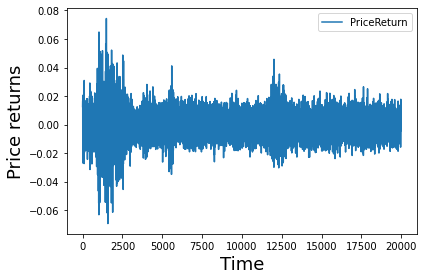

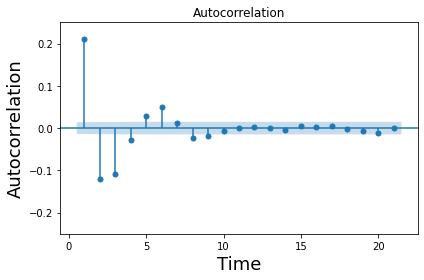

In [12]:
''' Absence of linear autocorrelations} in asset returns '''
''' intermittency '''

df['PriceReturn'] = (df['Price'] - df['Price'].shift(1)) / df['Price']
print(df['PriceReturn'].autocorr())

df.plot(x="Gen", y = ["PriceReturn"],
        kind="line")
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Price returns', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val1a.png', dpi = 300)
plt.show()

data = pd.DataFrame()
data['Time'] = df['Gen']
data['PriceReturn'] = df['PriceReturn']
data.set_index(['Time'])
del data['Time']
data = data.apply(lambda x: pd.Series(x.dropna().values))
# print(data.isnull().sum())

plot_acf(x=data, lags = 21, zero=False, alpha=0.05)
plt.ylim(-0.25, 0.25)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Autocorrelation', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val1b.png', dpi = 300)
plt.show()

PriceReturn    4.226421
dtype: float64
PriceReturn    4.226421
dtype: float64


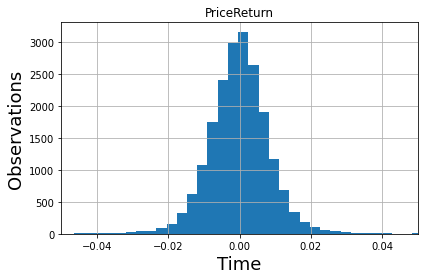

In [13]:
''' {Heavy tails distributions of returns} '''

print(data.kurt())
print(data.kurtosis())

data.hist('PriceReturn', bins = 50)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Observations', fontsize=fontsize)
plt.xlim(-0.05, 0.05)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val2.png', dpi = 300)
plt.show()

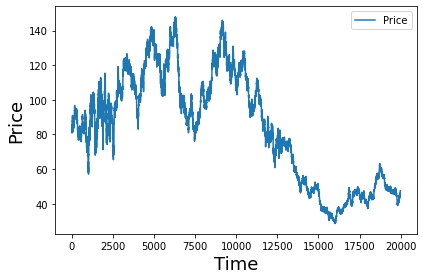

In [14]:
''' Gain loss assymetry '''

df.plot(x="Gen", y = ["Price"],
        kind="line")
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Price', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val3.png', dpi = 300)
plt.show()

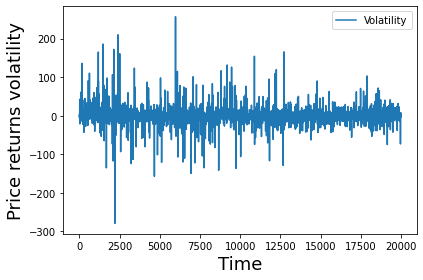

In [15]:
''' volatiltiy clustering '''

df['Volatility'] = df['PriceReturn'].pct_change()
df.plot(x="Gen", y = ["Volatility"],
        kind="line")
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Price returns volatility', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val4.png', dpi = 300)
plt.show()

In [16]:
''' leverage effect  and volatility-volume correlation'''
df2 = pd.DataFrame()

df2['Volatility'] = df['Volatility']
df2['PriceReturn'] = df['PriceReturn']
df2['Volume'] = df['Volume']
df2 = df2.apply(lambda x: pd.Series(x.dropna().values))
df2.corr()

,Volatility,PriceReturn,Volume
Volatility,1.000000,-0.000623,0.006877
PriceReturn,-0.000623,1.000000,-0.004944
Volume,0.006877,-0.004944,1.000000


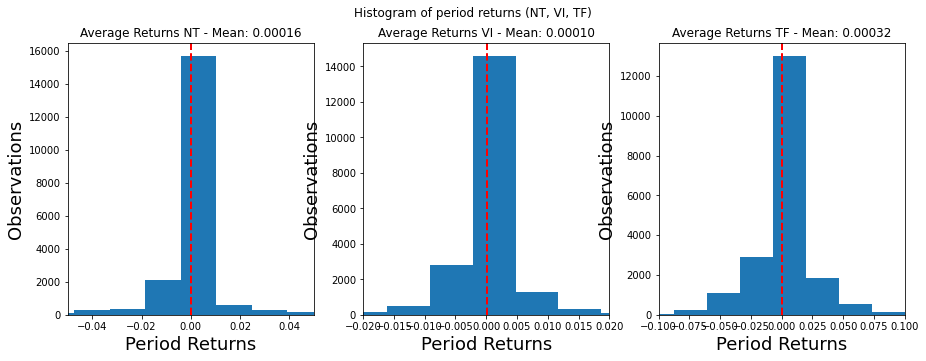

18.775323910785776
20.447910048262674
9.811927748242201
0.00016282967571542694
0.0001009105145170147
0.000324638297075967


In [33]:
''' Conditional heavy tail returns'''
bins = 20
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of period returns (NT, VI, TF)')

ax1.hist(df['NT_returns'], bins = bins)
num = df['NT_returns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.5f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(df['VI_returns'], bins = bins)
num = df['VI_returns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.5f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(df['TF_returns'], bins = bins)
num = df['TF_returns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.5f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations', fontsize=fontsize)
ax1.set_xlabel('Period Returns', fontsize=fontsize)
ax2.set_ylabel('Observations', fontsize=fontsize)
ax2.set_xlabel('Period Returns', fontsize=fontsize)
ax3.set_ylabel('Observations', fontsize=fontsize)
ax3.set_xlabel('Period Returns', fontsize=fontsize)

ax1.set_xlim(-0.05,0.05)
ax2.set_xlim(-0.02,0.02)
ax3.set_xlim(-0.1,0.1)
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val5.png', dpi = 300)
plt.tight_layout
plt.show()

print(df['NT_returns'].kurt())
print(df['VI_returns'].kurt())
print(df['TF_returns'].kurt())

print(df['NT_returns'].mean())
print(df['VI_returns'].mean())
print(df['TF_returns'].mean())



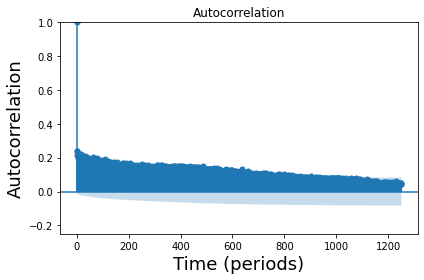

In [36]:
''' slow decay of autocorrelation in absolute returns '''

df['AbsReturns'] = abs(df['PriceReturn'])
data = pd.DataFrame()
data['Time'] = df['Gen']
data['AbsReturns'] = df['AbsReturns']
data.set_index(['Time'])
del data['Time']
data = data.apply(lambda x: pd.Series(x.dropna().values))

plot_acf(x=data, lags = 1250, alpha=0.05, auto_ylims=True)
plt.ylim(-0.25, 1.0)
plt.xlabel('Time (periods)', fontsize=fontsize)
plt.ylabel('Autocorrelation', fontsize=fontsize)
plt.tight_layout()
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/validation/val6.png', dpi = 300)
plt.show()
